<a href="https://colab.research.google.com/github/yeonghun00/real-estate/blob/main/real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import json

url = 'https://api.kbland.kr/land-extra/statistics/reference?%EC%A3%BC%EC%9B%94%EA%B0%84%EA%B5%AC%EB%B6%84=1&%EA%B8%B0%EC%A4%80%EB%85%84%EC%9B%94%EC%8B%9C%EC%9E%91%EC%9D%BC=2022-01-01&%EA%B8%B0%EC%A4%80%EB%85%84%EC%9B%94%EC%A2%85%EB%A3%8C%EC%9D%BC=2022-12-31'
data = requests.get(url).text
data = json.loads(data)
download_url = data['dataBody']['data']['시계열'][0]['이미지도메인URL'] + data['dataBody']['data']['시계열'][0]['파일경로'] + '/' + data['dataBody']['data']['시계열'][0]['파일명']
xls = pd.ExcelFile('https://file.kbland.kr/image/kbstar/land/statc/tmsr/monthly/ef7684fbb2e40b67.xlsx')

In [2]:
download_url

'https://file.kbland.kr/image/kbstar/land/statc/tmsr/monthly/49928d13caea2954.xlsx'

In [3]:
xls.sheet_names

['시계열',
 '안내',
 '★기간비교',
 '★지역비교',
 '1.매매종합',
 '2.매매APT',
 '3.매매단독',
 '4.매매연립',
 '5.전세종합',
 '6.전세APT',
 '7.전세단독',
 '8.전세연립',
 '9.KB아파트 월세지수+',
 '11.PIR(월별)',
 '12.J-PIR(월별)',
 '13.KB아파트담보대출PIR',
 '14.NEW_HAI',
 '15.KB-HOI',
 '16.선도50',
 '21.매수우위',
 '22.매매거래',
 '23.전세수급',
 '24.전세거래',
 '25.KB부동산 매매가격 전망지수',
 '26.KB부동산 전세가격 전망지수',
 '27.종합매매전세비',
 '28.아파트매매전세비',
 '29.단독매매전세비',
 '30.연립매매전세비',
 '31.전용면적별(구)APT매매',
 '32.면적별매매종합',
 '33.면적별단독매매',
 '34.면적별연립매매',
 '35.전용면적별(구)APT전세',
 '36.면적별전세종합',
 '37.면적별단독전세',
 '38.면적별연립전세',
 '39.전용면적별APT매매지수',
 '40.전용면적별APT전세지수',
 '41.평균매매',
 '42.평균전세',
 '43.중위매매',
 '44.중위전세',
 '45.㎡당평균매매',
 '46.㎡당평균전세',
 '47.㎡당아파트평균매매',
 '48.㎡당아파트평균전세',
 '49.㎡당 5분위 아파트 매매',
 '50.㎡당 5분위 아파트전세',
 '51.5분위(종합매매)',
 '52.5분위(종합전세)',
 '53.5분위(아파트매매)',
 '54.5분위(아파트전세)',
 '55.면적별(구)APT매매평균',
 '56.면적별(구)APT전세평균',
 '57.면적별APT매매평균',
 '58.면적별APT전세평균',
 '59.전월세전환율',
 '60.KB 오피스텔']


**1. Price Index**




매매종합 (Housing purchase price composite indices)

In [4]:
hpi_df = pd.read_excel(xls, '1.매매종합', header=3)

In [5]:
hpi_df = hpi_df[:hpi_df[hpi_df['Classification'].isnull()].index[0]]

In [6]:
# Date Formatting
from datetime import datetime

def date_format(df):
  c = []
  year = 0
  for i in df['Classification']:
    if str(i)[-1] == '1':
      year = str(i)[:-2]
      if len(year) < 3: c.append('19' + year + '/1')
      else: c.append(year + '/1')
    else:
      if len(year) < 3: c.append('19' + year + '/' + str(int(i)))
      else: c.append(year + '/' + str(int(i)))
  c = [datetime.strptime(x, '%Y/%m') for x in c] 
  df['Classification'] = c
  return df.set_index('Classification')

In [7]:
hpi_df = date_format(hpi_df)

In [8]:
hpi_df

,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,Seodaemun-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
Classification,,,,,,,,,,,,,,,,,,,,,
1986-01-01,34.656084,30.043817,41.939986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-02-01,34.656084,30.043817,41.88915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-01,34.707965,30.002377,41.88915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-04-01,34.448563,29.836618,41.736641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-01,34.292922,29.587979,41.279114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,121.591133,124.952358,126.037762,124.599371,116.192987,144.950073,133.062383,124.383338,124.885848,120.289067,...,104.077816,105.801478,NaN,NaN,101.544613,107.420511,NaN,NaN,103.709931,107.120042
2021-10-01,122.864781,126.325135,127.307387,129.423898,116.297279,146.302304,134.450298,125.522139,125.836891,120.637505,...,104.535031,106.334227,NaN,NaN,101.794449,108.503495,NaN,NaN,104.153005,107.910854
2021-11-01,124.221092,127.251681,128.10705,129.673769,116.876711,148.035610,134.886617,126.529630,126.815806,120.877025,...,105.626930,107.766484,NaN,NaN,102.724364,109.491791,NaN,NaN,105.052231,109.257573


In [9]:
s = hpi_df.iloc[0].isna() == False
cities = s[s].index.values
cities = ['Total', 'Seoul', 'Busan']

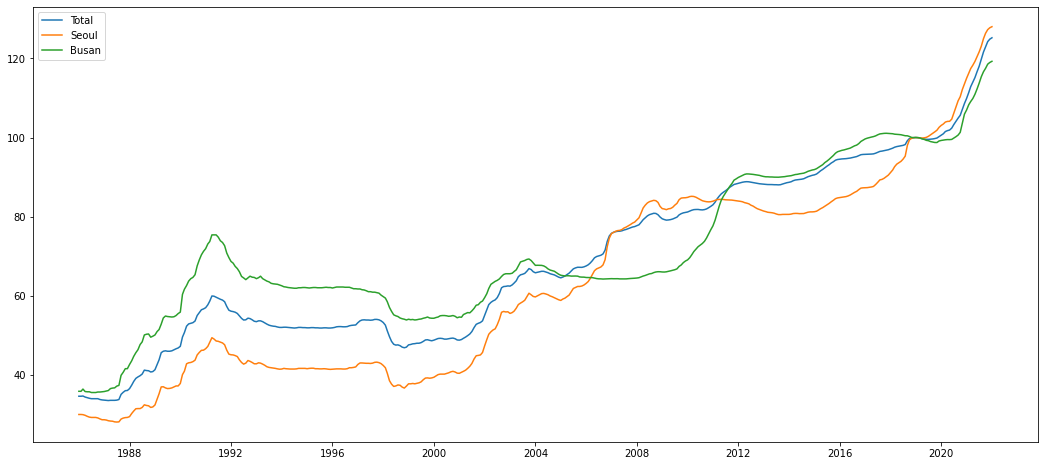

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(hpi_df[city])
plt.legend(cities)
plt.show()


전세종합 (Housing jeonse price composite indices)

In [11]:
hjp_df = pd.read_excel(xls, '5.전세종합', header=3)
hjp_df = date_format(hjp_df)

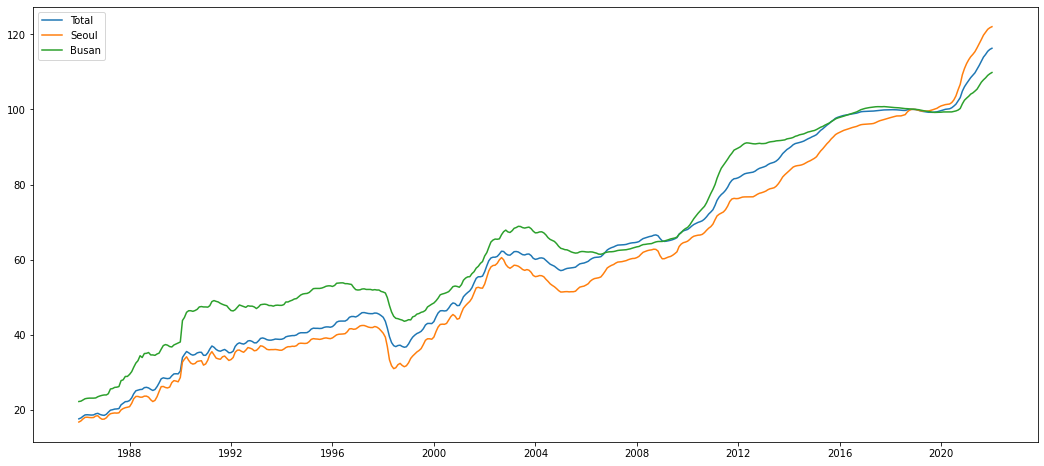

In [12]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(hjp_df[city])
plt.legend(cities)
plt.show()

**2. Ratio Index**

종합매매전세비 (Ratio of jeonse to purchase price for housing)

In [13]:
rjp_df = pd.read_excel(xls, '27.종합매매전세비', header=2)
rjp_df = rjp_df[:rjp_df[rjp_df['Unnamed: 0'].isnull()].index[0]]

In [14]:
def date_format2(df):
  dates = []
  y = 0
  for d in df['Unnamed: 0']:
    if type(d) == str: 
      y = d[d.find("'")+1:d.find('.')]
      dates.append(y+'/'+(d[d.find('.')+1:]))
    else: dates.append(y+'/'+str(d))

  dates = [datetime.strptime(x, '%y/%m') for x in dates] 
  df['Unnamed: 0'] = dates
  return df.set_index('Unnamed: 0')

In [15]:
rjp_df = date_format2(rjp_df)
rjp_df

,Total,Seoul,Northern seoul,Southern Seoul,6 Large Cities,Busan,Daegu,Incheon,Gwangju,Daejeon,...,Gyeonggi-do,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju/\nSeogwipo,Non Metropolitan Area
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2011-06-01,54.995742,47.081021,47.997733,46.176432,60.233835,61.318798,63.457160,48.018278,67.120289,63.583149,...,50.685280,57.278134,60.911362,57.325058,62.368713,58.000384,64.134851,59.420633,58.532243,59.998121
2011-07-01,55.183782,47.523669,48.365536,46.692933,60.198286,61.285864,63.495761,48.182729,67.111239,63.018937,...,51.113110,57.375782,60.730726,57.584254,62.092936,58.046818,64.282477,59.371579,58.498286,59.993477
2011-08-01,55.512878,48.227905,49.074596,47.392409,60.237012,61.290853,63.597096,48.428823,67.177023,62.631847,...,51.789446,57.151037,60.913197,57.895829,61.790934,57.940809,64.251640,59.353343,59.131604,59.991193
2011-09-01,55.968106,49.027421,49.939968,48.126941,60.419438,61.311359,63.815651,48.915756,67.494405,62.460214,...,52.625557,57.394449,61.049273,58.135446,61.577714,58.153763,64.208594,59.514929,59.100398,60.084697
2011-10-01,56.243344,49.488306,50.423850,48.565133,60.537230,61.350345,63.930203,49.319463,67.569968,62.312969,...,53.128813,57.415263,61.087234,58.258976,61.468952,58.373476,64.244927,59.650789,59.134717,60.155035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,63.2698,58.280457,58.613469,57.956567,63.599073,58.420905,65.889796,66.569465,64.976803,62.799458,...,63.649056,67.200800,68.811533,70.391542,70.427371,65.390562,71.234557,66.297696,58.447581,67.226934
2021-10-01,63.011851,57.990684,58.268375,57.720599,63.369867,58.316487,65.942242,66.009149,64.477175,62.554941,...,63.314921,66.933369,68.701395,70.043359,70.167920,65.412210,70.978560,66.212202,58.214475,67.045749
2021-11-01,62.839714,57.954194,58.325468,57.593089,63.118282,58.192551,66.028084,65.551069,63.682388,62.164308,...,63.086993,65.858817,68.578606,70.052056,69.876478,65.352161,71.160042,66.215128,57.903716,66.918140


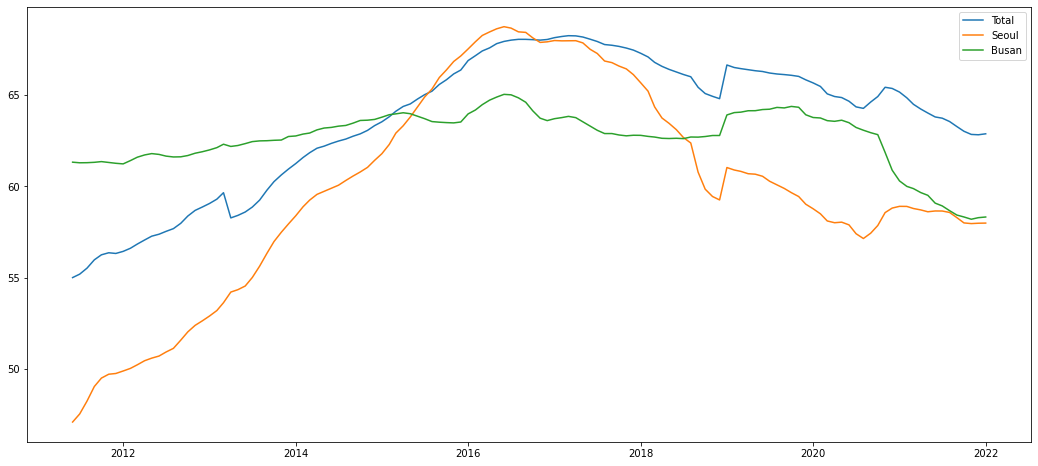

In [16]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rjp_df[city])
plt.legend(cities)
plt.show()

아파트매매전세비 (Ratio of Jeonse to Purchase Price for Apartment)

In [17]:
rja_df = pd.read_excel(xls, '28.아파트매매전세비', header=2)
rja_df = rja_df[:rja_df[rja_df['Unnamed: 0'].isnull()].index[0]]

In [18]:
rja_df = date_format2(rja_df)

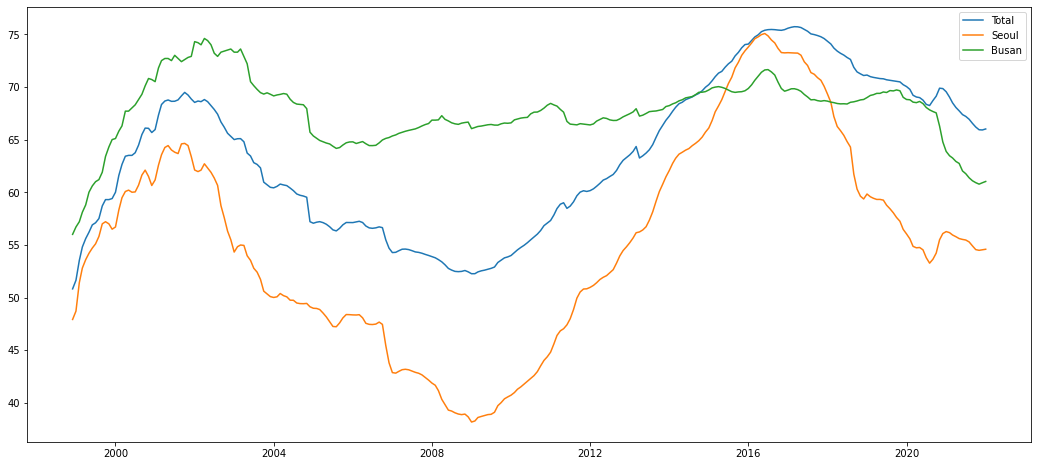

In [19]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rja_df[city])
plt.legend(cities)
plt.show()

단독매매전세비 (Ratio of Jeonse to Purchase Price for Houses)

In [20]:
rjs_df = pd.read_excel(xls, '29.단독매매전세비', header=2)
rjs_df = rjs_df[:rjs_df[rjs_df['Unnamed: 0'].isnull()].index[0]]

In [21]:
rjs_df = date_format2(rjs_df)

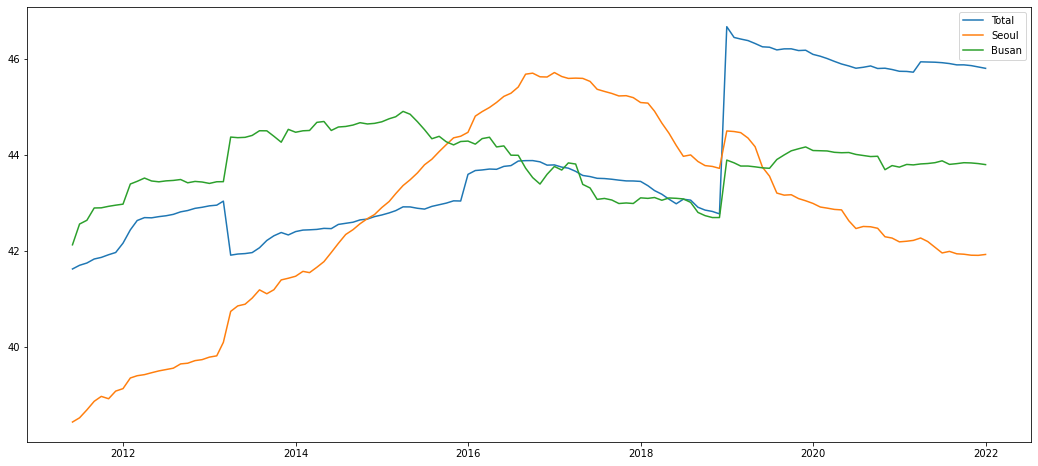

In [22]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rjs_df[city])
plt.legend(cities)
plt.show()

연립매매전세비 (Ratio of Jeonse to Purchase Price for Flats)

In [23]:
rjf_df = pd.read_excel(xls, '30.연립매매전세비', header=2)
rjf_df = rjf_df[:rjf_df[rjf_df['Unnamed: 0'].isnull()].index[0]]

In [24]:
rjf_df = date_format2(rjf_df)

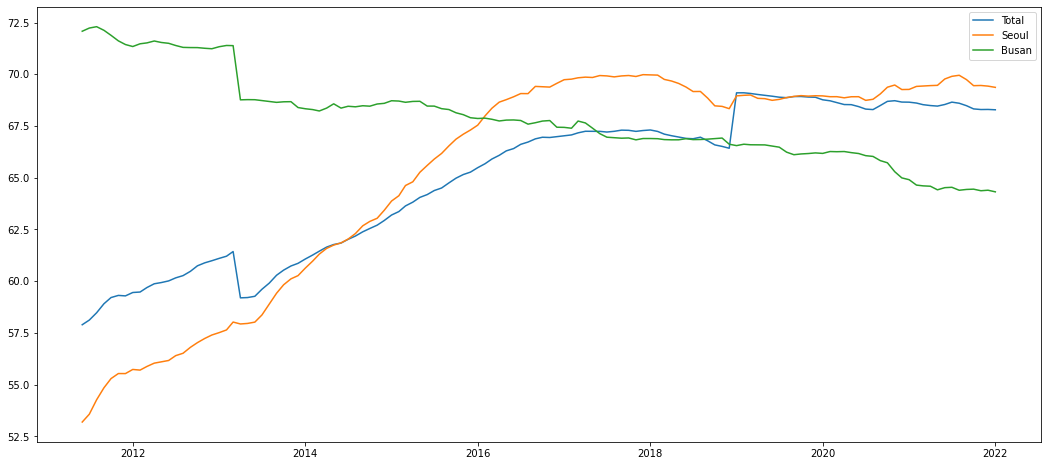

In [25]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rjf_df[city])
plt.legend(cities)
plt.show()

Housing affordability index


**4. Trade index**

매수우위 (Trends on the Sell / Buy activities by region)

In [26]:
'''
buyer: Seller's No.> Buyer's No.	
Seller: Seller's No.< Buyer's No.	
similar: Seller's No.≒Buyer's No.	
index: Buyer Superiority Index
'''

"\nbuyer: Seller's No.> Buyer's No.\t\nSeller: Seller's No.< Buyer's No.\t\nsimilar: Seller's No.≒Buyer's No.\t\nindex: Buyer Superiority Index\n"

In [27]:
ta_df = pd.read_excel(xls, '21.매수우위', header=1, usecols="A:CS")
ta_df['Unnamed: 0'].fillna(method='bfill', inplace=True)
ta_df = ta_df[:ta_df[ta_df['Unnamed: 0'].isnull()].index[0]]
ta_df = date_format2(ta_df)

In [28]:
# format columns
import numpy as np
city_columns = [x.encode("ascii", "ignore").decode().replace(' ','') for x in ta_df.columns][::4] 
symbol_columns = ['seller', 'buyer', 'similar', 'index']
ta_df.columns = [c+'_'+s for c in city_columns for s in symbol_columns]
ta_df = ta_df.iloc[2:]
ta_df = ta_df.replace('-', np.nan)
ta_df

,Total_seller,Total_buyer,Total_similar,Total_index,Seoul_seller,Seoul_buyer,Seoul_similar,Seoul_index,Northernseoul_seller,Northernseoul_buyer,...,Gyeongsangnam-do_similar,Gyeongsangnam-do_index,NonMetropolitanArea_seller,NonMetropolitanArea_buyer,NonMetropolitanArea_similar,NonMetropolitanArea_index,Jeju_seller,Jeju_buyer,Jeju_similar,Jeju_index
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-01,72.534464,4.984093,22.481442,32.449629,60.346696,6.608884,33.044420,46.262189,NaN,NaN,...,NaN,NaN,83.281412,3.946002,12.772586,20.664590,NaN,NaN,NaN,NaN
2000-02-01,79.123173,6.054280,14.822547,26.931106,66.420275,11.193242,22.386484,44.772967,NaN,NaN,...,NaN,NaN,90.356394,2.935010,6.708595,12.578616,NaN,NaN,NaN,NaN
2000-03-01,78.787879,4.444444,16.767677,25.656566,73.300000,9.900000,16.800000,36.600000,NaN,NaN,...,NaN,NaN,87.869521,1.834862,10.295617,13.965341,NaN,NaN,NaN,NaN
2000-04-01,80.360721,2.605210,17.034068,22.244489,72.500000,3.100000,24.400000,30.600000,NaN,NaN,...,NaN,NaN,79.800000,0.900000,19.300000,21.100000,NaN,NaN,NaN,NaN
2000-05-01,81.451613,1.209677,17.338710,19.758065,68.700000,3.100000,28.200000,34.400000,NaN,NaN,...,NaN,NaN,88.798371,0.916497,10.285132,12.118126,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,17.052553,25.358618,57.588829,108.306064,11.787993,18.037372,70.174635,106.249379,13.294255,17.004810,...,57.820530,120.172231,18.042051,31.689511,50.268438,113.647460,8.333333,25.000000,66.666667,116.666667
2021-10-01,19.211832,19.107856,61.680313,99.896024,15.344412,11.829459,72.826129,96.485048,18.638635,11.269968,...,57.376255,104.303828,17.496444,27.372965,55.130591,109.876521,4.347826,30.434783,65.217391,126.086957
2021-11-01,32.514916,7.970128,59.514956,75.455212,36.545597,3.408928,60.045474,66.863331,39.938567,2.695203,...,57.169759,86.106237,25.514920,15.763364,58.721716,90.248444,8.000000,8.000000,84.000000,100.000000


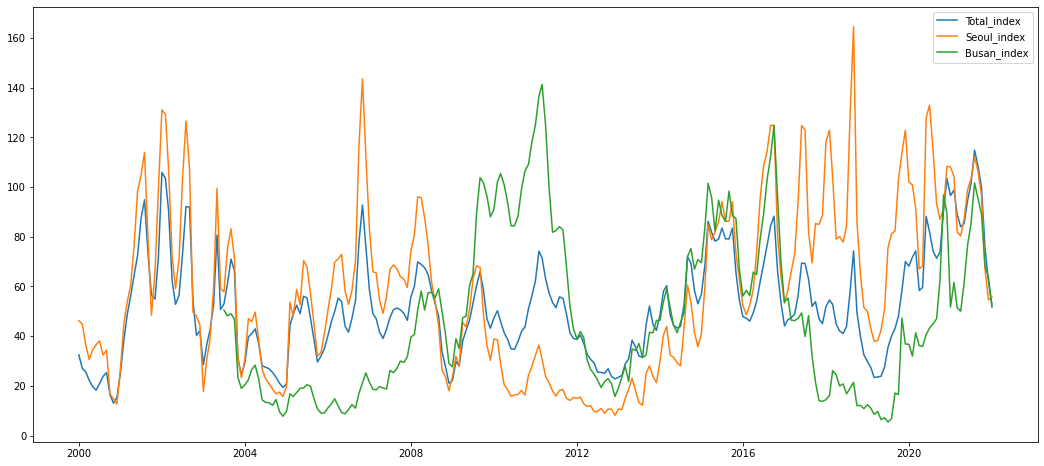

In [29]:
cities = ['Total_index', 'Seoul_index', 'Busan_index']
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(ta_df[city])
plt.legend(cities)
plt.show()

Sensitivity on the Housing transaction by region

Jeonse demand & supply trends by region

Sensitivity on the jeonse transaction by region